# DATA20001 Deep Learning - Exercise 3

**Due Tuesday November 21, before 12:00 PM (noon)**

In this second computer exercise we are going to work with images and convolutional neural networks, or CNNs. The entire exercise will be done using [Keras](https://keras.io/).

## Exercise 3.1. A simple CNN (2 points)

We'll start by showing you step by step how to create a simple CNN in Keras.  At some points you'll have to fill some code yourself. You can refer to the [Keras documentation](https://keras.io/) to find the right commands.

First, let's load all the needed libraries.

In [1]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.layers.convolutional import Conv2D

import exer3_dataset
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)

Using TensorFlow backend.


### Dataset

A key part of machine learning is always handling and preprocessing the dataset.  In this exercise we've made your life easier by having already prepared a dataset and split it into training and testing parts. 

Run the following command to download the dataset.  The first time you run this it will take while as it's pulling the data down over the network.

In [2]:
(x_train, y_train), (x_test, y_test) = exer3_dataset.load_data()

4349952/4422102 [============================>.] - ETA: 0s

Let's see how the data is formatted by printing the dimensionalities of the variables (tensors).

In [3]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (60000, 28, 28, 1)
y_train (60000,)
x_test (10000, 28, 28, 1)
y_test (10000,)


Above you can see we have 60000 samples of 28x28 images in `x_train`. The third dimension of the images is just 1 as there is just a single grayscale value. The test set is formatted in the same way, except we have just 10000 samples.

The class labels are stored in `y_train`. Let's print the first 10 values just to see what they are...

In [4]:
print(y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


These are the correct classes for each image.  These actually refer to different types of clothing.  Let's define the mapping from class indices to human-understandable labels as a Python dictionary. We have 10 classes, i.e., 10 categories of images to classify.

In [5]:
num_classes = 10

labels = {
  0: 'T-shirt/top',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle boot'
}

So, according to this the first image is of class 9, which is an "Ankle boot". Let's look at the first image.

In [6]:
img0=x_train[0,:,:].reshape(28,28)
print(img0)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

That's pretty hard to decipher. Let's instead draw it as an image, interpreting each number as a grayscale value.

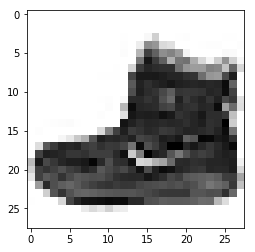

In [7]:
plt.imshow(img0, cmap='Greys', interpolation='none')

I suppose that's an ankle boot...

Typically we use so called one-hot encoding for the class labels in neural networks.  That is instead of having a single value which can have one of 10 label values (e.g. 0, ..., 9), we have 10 values which can each be 1 or 0 depending on if that class is present. 

Then for the output we typically expect something that looks like a probability distribution over these 10 classes, i.e., each neuron has a value between 0 and 1 indicating the probability of that class being present. For example if the tenth (last) neuron is 0.8, then we have 80% probability of the image containing an ankle boot. (The sum over all classes should also be 1.0 in order for it be a probability distribution.)

Here we'll call a utility function to transform the class labels into a one-hot encoding format.

In [8]:
print("Old format", y_train[:5])
y_train_cat = np_utils.to_categorical(y_train, num_classes)
y_test_cat = np_utils.to_categorical(y_test, num_classes)
print("One-hot encoding\n", y_train_cat[:5,])

Old format [9 0 0 3 0]
One-hot encoding
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


You can take a look at the output above. For example for the first image, which has label 9, the tenth value is 1, the rest are zero.

Let's display the first example image of each class just for fun.

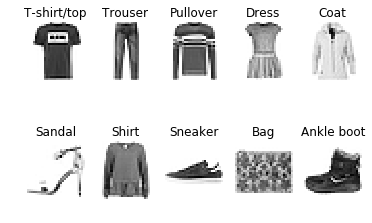

In [9]:
for l in range(10):
    idx = np.argwhere(y_train==l)[0]
  
    plt.subplot(2, 5, l+1)

    img = x_train[idx,:,:].reshape(28,28)

    plt.imshow(img, cmap='Greys', interpolation='none')
    plt.title(labels[l])
    plt.axis('off')

Finally, we normalize the images to be in the range 0.0 to 1.0 instead of 0 to 255.

In [10]:
x_train = x_train/255
x_test = x_test/255

### Create the network

OK, let's create a simple CNN that learns to detect these classes. 

<span style="background-color: yellow">Below you need to fill in the neural network layers</span>, which are (in order):

- One 2D convolutional layer with kernel size 3x3 and 32 output filters/features

- ReLU activation

- Max pooling (2D) of size 2x2

- Fully-connected (dense) layer to 10 output units (for the 10 classes)

- Finally softmax activation to get a probability-like output.

**Hint:** For the first layer you'll need to specify the shape of the input tensor manually by giving this parameter: `input_shape=(28, 28, 1)`.

Before the dense layer we need a `Flatten()` layer. This is a special layer in Keras that transforms the 2D output into 1D. The 2D convolution works with neurons in 2D, but the dense layer works in 1D.

In [11]:
# Initialize model
model = Sequential()

# Add layers here
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
# Let's use categorical crossentry and sgd optmizer
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
None


### Training

Now let's train it for 10 epochs. This takes roughly 5 minutes on a CPU.

We use a batch size of 128, which means that the weight updates are calculated for 128 inputs at a time.

In [12]:
%%time

epochs = 10 # one epoch typically takes a minute or two

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 13s - loss: 1.0389 - acc: 0.6645    - ETA: 0s - loss: 1.0578 - a
Epoch 2/10
60000/60000 [==============================] - 12s - loss: 0.6088 - acc: 0.7871    
Epoch 3/10
60000/60000 [==============================] - 12s - loss: 0.5488 - acc: 0.8053    
Epoch 4/10
60000/60000 [==============================] - 12s - loss: 0.5243 - acc: 0.8132    
Epoch 5/10
60000/60000 [==============================] - 12s - loss: 0.5017 - acc: 0.8233    
Epoch 6/10
60000/60000 [==============================] - 12s - loss: 0.4883 - acc: 0.8278    
Epoch 7/10
60000/60000 [==============================] - 12s - loss: 0.4761 - acc: 0.8322    
Epoch 8/10
60000/60000 [==============================] - 10s - loss: 0.4634 - acc: 0.8375    
Epoch 9/10
60000/60000 [==============================] - 10s - loss: 0.4554 - acc: 0.8390    
Epoch 10/10
60000/60000 [==============================] - 10s - loss: 0.4481 - acc: 0.8440    
CPU times: user 6min 

Let's plot how the loss and accuracy have changed over the training time.

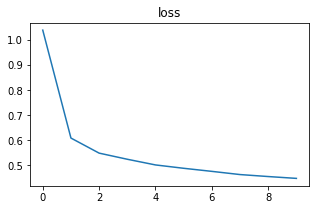

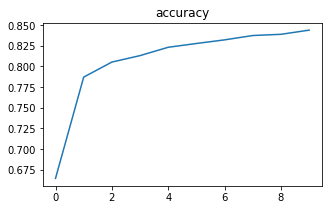

In [13]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')


### Inference

Next, let's how well the model can generalize to data it hasn't seen before, i.e., the test data. Recall from your basic machine learning that this is really the crucial part: it's trivial to learn to perfectly model the training set (you can just memorize each example), the hard part is to learn something general about the classes. So let's try to predict the labels of the test dataset, and compare to the correct labels.

In [14]:
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 83.73%


You should get roughly 84% above if you have done exactly the same steps.  The real result can vary a lot on the random initialisation as we run only 10 epochs here.

### Visualise the weights

An interesting thing is to visualise the learned weights for the convolutional layer.  We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

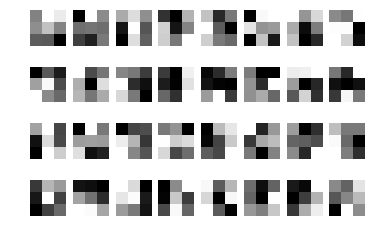

In [15]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems they have learned to detect various corners and edges.

## Exercise 3.2. Make a better CNN (4 points)

Make a network that performs better than the very simple one above. For your convenience we have copied the essential code from the previous exercise to the cells below. If you just did the previous exercise you don't need to rerun the first cell.

<span style="background-color: yellow">Your task is to do at least five (5) reparameterizations for the previous exercise's network and compare the results. At least one of them should have a 5% improvement in the test set result (generalization). Each reparameterization should change a different aspect in the network, while the rest of the parameters are the same as in 3.1. Print out all of the plots and results for each setup into the notebook you return, and analyze and discuss the results briefly in the last cell in the bottom.</span>

You probably need to make a few more cells below, and copy-paste the model code (at least five times).

Example parameters to try to change: 

- number of layers or neurons
- activation functions
- epochs
- batch sizes
- optimizer, see [Keras' documentation on optimizers](https://keras.io/optimizers/)
- max-pooling on/off on certain layers

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [ ]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.layers.convolutional import Conv2D

import exer3_dataset
from keras.utils import np_utils
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = exer3_dataset.load_data()

# Normalize
x_train = x_train/255
x_test = x_test/255

num_classes = 10

y_train_cat = np_utils.to_categorical(y_train, num_classes)
y_test_cat = np_utils.to_categorical(y_test, num_classes)

In [20]:
np.random.seed(123)
model = Sequential()

# Add model here
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

# You can also try different optimizers below
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                54090     
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
%%time

# Training
epochs = 10

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 11s - loss: 0.5314 - acc: 0.8142    
Epoch 2/10
60000/60000 [==============================] - 10s - loss: 0.3608 - acc: 0.8733    
Epoch 3/10
60000/60000 [==============================] - 10s - loss: 0.3166 - acc: 0.8896    
Epoch 4/10
60000/60000 [==============================] - 10s - loss: 0.2930 - acc: 0.8970    
Epoch 5/10
60000/60000 [==============================] - 10s - loss: 0.2761 - acc: 0.9036    
Epoch 6/10
60000/60000 [==============================] - 11s - loss: 0.2636 - acc: 0.9082    
Epoch 7/10
60000/60000 [==============================] - 11s - loss: 0.2528 - acc: 0.9112    
Epoch 8/10
60000/60000 [==============================] - 11s - loss: 0.2444 - acc: 0.9144    
Epoch 9/10
60000/60000 [==============================] - 11s - loss: 0.2365 - acc: 0.9172    
Epoch 10/10
60000/60000 [==============================] - 11s - loss: 0.2296 - acc: 0.9202    
CPU times: user 6min 24s, sys: 1min 44s, total: 8

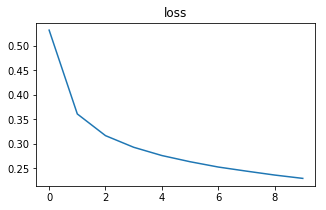

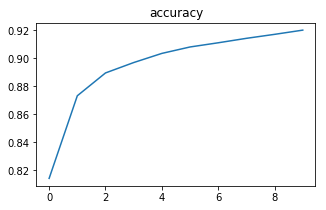

In [22]:
# Plot loss and accuracy in training

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

In [23]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 89.55%


In [ ]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.layers.convolutional import Conv2D

import exer3_dataset
from keras.utils import np_utils
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = exer3_dataset.load_data()

# Normalize
x_train = x_train/255
x_test = x_test/255

num_classes = 10

y_train_cat = np_utils.to_categorical(y_train, num_classes)
y_test_cat = np_utils.to_categorical(y_test, num_classes)


In [24]:
np.random.seed(123)
model = Sequential()

# Add model here
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

# You can also try different optimizers below
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                216330    
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
%%time

# Training
epochs = 10

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 14s - loss: 0.8398 - acc: 0.7223    
Epoch 2/10
60000/60000 [==============================] - 12s - loss: 0.5752 - acc: 0.7970    
Epoch 3/10
60000/60000 [==============================] - 12s - loss: 0.5304 - acc: 0.8139    
Epoch 4/10
60000/60000 [==============================] - 12s - loss: 0.5112 - acc: 0.8207    
Epoch 5/10
60000/60000 [==============================] - 12s - loss: 0.4865 - acc: 0.8315    
Epoch 6/10
60000/60000 [==============================] - 12s - loss: 0.4748 - acc: 0.8357    
Epoch 7/10
60000/60000 [==============================] - 12s - loss: 0.4631 - acc: 0.8385    
Epoch 8/10
60000/60000 [==============================] - 12s - loss: 0.4492 - acc: 0.8438    
Epoch 9/10
60000/60000 [==============================] - 13s - loss: 0.4425 - acc: 0.8459    
Epoch 10/10
60000/60000 [==============================] - 13s - loss: 0.4352 - acc: 0.8492    
CPU times: user 6min 46s, sys: 50.5 s, total: 7mi

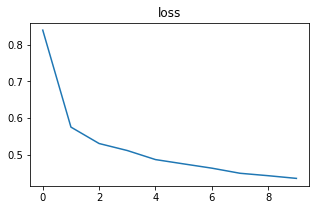

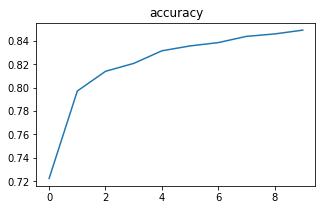

In [26]:
# Plot loss and accuracy in training

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

In [27]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 84.21%


In [ ]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.layers.convolutional import Conv2D

import exer3_dataset
from keras.utils import np_utils
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = exer3_dataset.load_data()

# Normalize
x_train = x_train/255
x_test = x_test/255

num_classes = 10

y_train_cat = np_utils.to_categorical(y_train, num_classes)
y_test_cat = np_utils.to_categorical(y_test, num_classes)

In [40]:
np.random.seed(123)
model = Sequential()

# Add model here
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(AveragePooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

# You can also try different optimizers below
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_17 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                8010      
__________

In [41]:
%%time

# Training
epochs = 10

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 17s - loss: 1.3875 - acc: 0.5536    
Epoch 2/10
60000/60000 [==============================] - 16s - loss: 0.8088 - acc: 0.7113    
Epoch 3/10
60000/60000 [==============================] - 17s - loss: 0.7309 - acc: 0.7334    
Epoch 4/10
60000/60000 [==============================] - 17s - loss: 0.6878 - acc: 0.7468    
Epoch 5/10
60000/60000 [==============================] - 16s - loss: 0.6584 - acc: 0.7584    
Epoch 6/10
60000/60000 [==============================] - 16s - loss: 0.6376 - acc: 0.7650    
Epoch 7/10
60000/60000 [==============================] - 17s - loss: 0.6157 - acc: 0.7723    
Epoch 8/10
60000/60000 [==============================] - 17s - loss: 0.5971 - acc: 0.7801    
Epoch 9/10
60000/60000 [==============================] - 16s - loss: 0.5837 - acc: 0.7864    
Epoch 10/10
60000/60000 [==============================] - 16s - loss: 0.5706 - acc: 0.7927    
CPU times: user 12min 59s, sys: 3min 25s, total: 

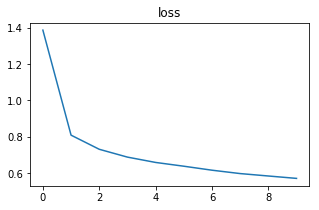

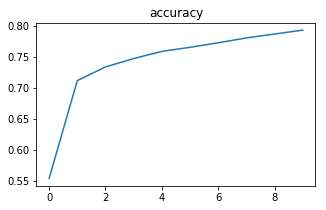

In [42]:
# Plot loss and accuracy in training

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

In [43]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 76.90%


In [48]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.layers.convolutional import Conv2D

import exer3_dataset
from keras.utils import np_utils
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = exer3_dataset.load_data()

# Normalize
x_train = x_train/255
x_test = x_test/255

num_classes = 10

y_train_cat = np_utils.to_categorical(y_train, num_classes)
y_test_cat = np_utils.to_categorical(y_test, num_classes)

In [64]:
# Initialize model
model = Sequential()

# Add layers here
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('selu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
# Let's use categorical crossentry and sgd optmizer
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_27 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                54090     
_________________________________________________________________
activation_28 (Activation)   (None, 10)                0         
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
%%time

# Training
epochs = 10

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 17s - loss: 0.9101 - acc: 0.7172    
Epoch 2/10
60000/60000 [==============================] - 15s - loss: 0.5622 - acc: 0.8047    
Epoch 3/10
60000/60000 [==============================] - 15s - loss: 0.5059 - acc: 0.8235    
Epoch 4/10
60000/60000 [==============================] - 15s - loss: 0.4744 - acc: 0.8356    
Epoch 5/10
60000/60000 [==============================] - 15s - loss: 0.4582 - acc: 0.8394    - ETA: 0s - loss: 0.4581 - acc: 0.83
Epoch 6/10
60000/60000 [==============================] - 16s - loss: 0.4433 - acc: 0.8450    
Epoch 7/10
60000/60000 [==============================] - 15s - loss: 0.4304 - acc: 0.8492    
Epoch 8/10
60000/60000 [==============================] - 15s - loss: 0.4222 - acc: 0.8533    
Epoch 9/10
60000/60000 [==============================] - 15s - loss: 0.4131 - acc: 0.8556    
Epoch 10/10
60000/60000 [==============================] - 16s - loss: 0.4046 - acc: 0.8591    
CPU times: us

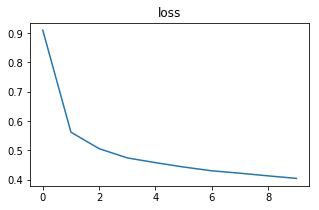

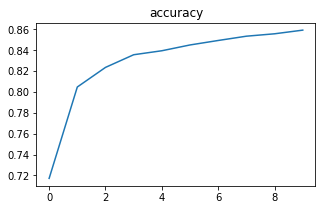

In [66]:
# Plot loss and accuracy in training

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

In [67]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 84.20%


In [ ]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.layers.convolutional import Conv2D

import exer3_dataset
from keras.utils import np_utils
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = exer3_dataset.load_data()

# Normalize
x_train = x_train/255
x_test = x_test/255

num_classes = 10

y_train_cat = np_utils.to_categorical(y_train, num_classes)
y_test_cat = np_utils.to_categorical(y_test, num_classes)

In [91]:
# Initialize model
model = Sequential()

# Add layers here
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
# Let's use categorical crossentry and sgd optmizer
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_37 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                54090     
_________________________________________________________________
activation_38 (Activation)   (None, 10)                0         
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
None


In [92]:
%%time

# Training
epochs = 30

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/30
60000/60000 [==============================] - 16s - loss: 1.0128 - acc: 0.6768    
Epoch 2/30
60000/60000 [==============================] - 16s - loss: 0.6097 - acc: 0.7887    
Epoch 3/30
60000/60000 [==============================] - 17s - loss: 0.5511 - acc: 0.8051    
Epoch 4/30
60000/60000 [==============================] - 16s - loss: 0.5219 - acc: 0.8162    
Epoch 5/30
60000/60000 [==============================] - 15s - loss: 0.5080 - acc: 0.8204    
Epoch 6/30
60000/60000 [==============================] - 11s - loss: 0.4933 - acc: 0.8252    
Epoch 7/30
60000/60000 [==============================] - 11s - loss: 0.4862 - acc: 0.8285    
Epoch 8/30
60000/60000 [==============================] - 10s - loss: 0.4768 - acc: 0.8333    
Epoch 9/30
60000/60000 [==============================] - 10s - loss: 0.4700 - acc: 0.8347    
Epoch 10/30
60000/60000 [==============================] - 12s - loss: 0.4659 - acc: 0.8365    
Epoch 11/30
60000/60000 [========================

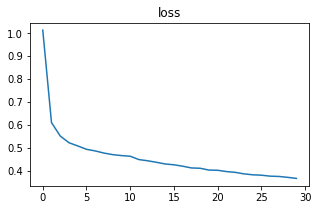

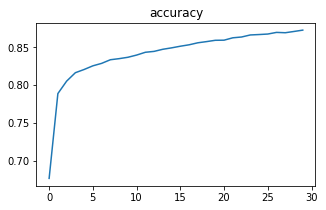

In [93]:
# Plot loss and accuracy in training

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

In [94]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 86.08%


In [ ]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.layers.convolutional import Conv2D

import exer3_dataset
from keras.utils import np_utils
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = exer3_dataset.load_data()

# Normalize
x_train = x_train/255
x_test = x_test/255

num_classes = 10

y_train_cat = np_utils.to_categorical(y_train, num_classes)
y_test_cat = np_utils.to_categorical(y_test, num_classes)

In [76]:
# Initialize model
model = Sequential()

# Add layers here
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(UpSampling2D(size=(2, 2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
# Let's use categorical crossentry and sgd optmizer
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_31 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 21632)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                216330    
_________________________________________________________________
activation_32 (Activation)   (None, 10)                0         
Total para

In [77]:
%%time

# Training
epochs = 10

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 39s - loss: 0.8156 - acc: 0.7293    
Epoch 2/10
60000/60000 [==============================] - 40s - loss: 0.5536 - acc: 0.8036    
Epoch 3/10
60000/60000 [==============================] - 41s - loss: 0.5053 - acc: 0.8211    
Epoch 4/10
60000/60000 [==============================] - 40s - loss: 0.4711 - acc: 0.8345    
Epoch 5/10
60000/60000 [==============================] - 37s - loss: 0.4505 - acc: 0.8423    
Epoch 6/10
60000/60000 [==============================] - 37s - loss: 0.4287 - acc: 0.8500    
Epoch 7/10
60000/60000 [==============================] - 40s - loss: 0.4137 - acc: 0.8571    
Epoch 8/10
60000/60000 [==============================] - 41s - loss: 0.4014 - acc: 0.8604    
Epoch 9/10
60000/60000 [==============================] - 38s - loss: 0.3917 - acc: 0.8643    
Epoch 10/10
60000/60000 [==============================] - 32s - loss: 0.3820 - acc: 0.8684    
CPU times: user 15min 35s, sys: 3min, total: 18mi

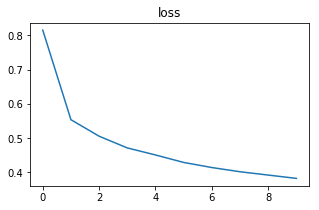

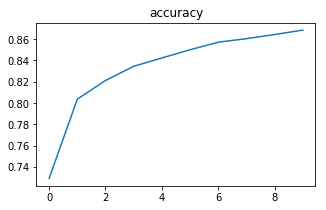

In [78]:
# Plot loss and accuracy in training

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

In [79]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 86.43%


In [ ]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.layers.convolutional import Conv2D

import exer3_dataset
from keras.utils import np_utils
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = exer3_dataset.load_data()

# Normalize
x_train = x_train/255
x_test = x_test/255

num_classes = 10

y_train_cat = np_utils.to_categorical(y_train, num_classes)
y_test_cat = np_utils.to_categorical(y_test, num_classes)

In [87]:
# Initialize model
model = Sequential()

# Add layers here
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
# Let's use categorical crossentry and sgd optmizer
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_35 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                54090     
_________________________________________________________________
activation_36 (Activation)   (None, 10)                0         
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
None


In [88]:
%%time

# Training
epochs = 10

history = model.fit(x_train, 
                    y_train_cat, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 12s - loss: 0.5357 - acc: 0.8160    
Epoch 2/10
60000/60000 [==============================] - 12s - loss: 0.3543 - acc: 0.8778    
Epoch 3/10
60000/60000 [==============================] - 12s - loss: 0.3151 - acc: 0.8909    
Epoch 4/10
60000/60000 [==============================] - 12s - loss: 0.2933 - acc: 0.8972    
Epoch 5/10
60000/60000 [==============================] - 12s - loss: 0.2748 - acc: 0.9033    
Epoch 6/10
60000/60000 [==============================] - 12s - loss: 0.2607 - acc: 0.9089    
Epoch 7/10
60000/60000 [==============================] - 12s - loss: 0.2505 - acc: 0.9124    
Epoch 8/10
60000/60000 [==============================] - 12s - loss: 0.2401 - acc: 0.9156    
Epoch 9/10
60000/60000 [==============================] - 12s - loss: 0.2333 - acc: 0.9176    
Epoch 10/10
60000/60000 [==============================] - 12s - loss: 0.2252 - acc: 0.9207    
CPU times: user 6min 36s, sys: 1min 37s, total: 8

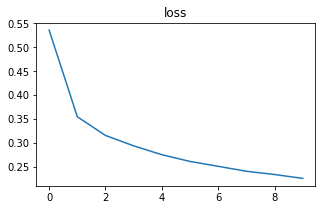

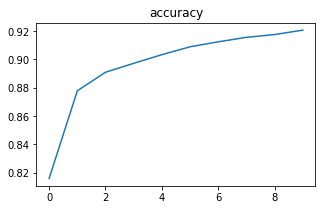

In [89]:
# Plot loss and accuracy in training

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy')

In [90]:
# Evaluate on test set
scores = model.evaluate(x_test, y_test_cat, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 89.64%


Discussion:
I have tried 7 times:
1st time: I only change the optimizer to be RMSprop, the accuracy of test data is 89.55%. 2nd time: I only remove the maxpooling, accuracy of test data is 84.21%. 3rd time: I only add another convolutional layer, accuracy of test data is 76.9%. 4th time: I only change the activation function of convolutional layer to be selu, accuracy of test data is 84.2%. 5th time: I only change the epochs to be 30, the accuracy of test data is 86.08%. 6th time: I only add an upsampling layer, accuracy of test data is 86.43%. 7th time: I only change the optimizer to be Adam, the accuracy of test data is 89.64%. The original accuracy of test data is 83.73%. Thus changing optimizer can improve performance of models the best and in my case, Adam can give better result and it has 5.91% improvement in the test set result. In addition, RMSprop has 5.82% improvement in the test set result. Adding upsampling layer before the dense layer is the third best method to improve performance of the model in my case. Changing activation function does not improve performance of the model that much. Adding another convolutional layer after the first convolutional layer makes performance of the model worse in my case.
